In [1]:
#%matplotlib inline
#from __future__ import print_function
import numpy as np
import time

In [2]:
from tlpipe.pipeline.pipeline import run_pipeline
from tlpipe.plot import plot_waterfall
from tlpipe.timestream import tod_edit
from tlpipe.timestream import tod_noise
from tlpipe.timestream import tod_svd
from tlpipe.timestream import timestream_task

from MeerKAT_utils.src import fn_plot

reload(tod_edit)
reload(tod_noise)
reload(tod_svd)
reload(plot_waterfall)
reload(fn_plot)

DATA_BASE = '/scratch/users/ycli/'
#os.environ['TL_OUTPUT'] = DATA_BASE + 'meerkat/'



mask ns


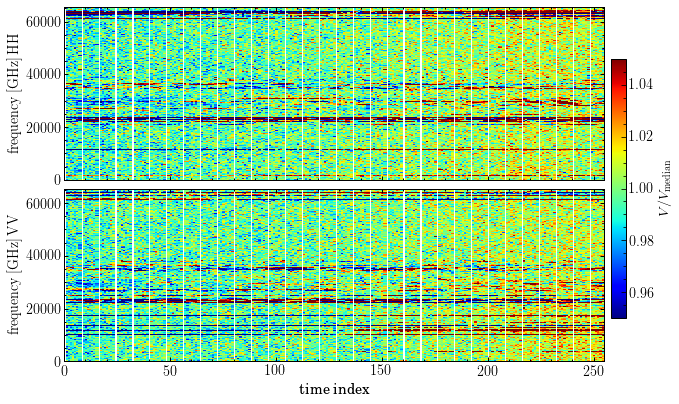

In [7]:
@run_pipeline
def plot_wf():
    
    show = 0
    
    pipe_tasks  = []
    data_base   = DATA_BASE
    pipe_outdir = data_base + '.test/'
    pipe_feedback = 0
    
    bad_time_list = None
    bad_freq_list = None #[[0, 200], [11500, 12000], [18000, 30000], [34000, 38500], [60000, None]]
    
    #pipe_tasks.append(tod_noise.DataEdit)
    pipe_tasks.append(plot_waterfall.PlotMeerKAT)
    #pipe_tasks.append(plot_waterfall.PlotVvsTime)
    #pipe_tasks.append(plot_waterfall.PlotPointingvsTime)
    #pipe_tasks.append(plot_waterfall.CheckSpec)
    
    file_list = ['test.h5', ]
    
    pned_input_files  = ['%s'%f for f in file_list]
    pned_corr = 'auto'
    pned_pol_select = (0, 2) # ignore the cross pol
    #pned_freq_select = (2100, 3100)
    #pned_out = 'pned'
    pned_bad_time_list = bad_time_list
    pned_bad_freq_list = bad_freq_list
    pned_bandpass_cal  = True
    pned_output_files  = ['pned_%s'%f for f in file_list]
    
    pkat_input_files = ['pned_%s'%f for f in file_list]
    #pkat_input_files = ['fn_analysis/%s_%s'%(prefix, f) for f in file_list]
    pkat_re_scale = None #0.2 #2.0 #0.2
    #pkat_freq_select = (2100, 3100)
    pkat_vmax = 1.05
    pkat_vmin = 0.95
    #pkat_xmin = 1000
    #pkat_xmax = 1200
    #pkat_ymin = 10000
    #pkat_ymax = 15000
    pkat_main_data = 'vis'
    pkat_fig_name = 'wf/test'
    pkat_flag_mask = True
    pkat_flag_ns = True
    pkat_flag_raw = False
    pkat_bad_freq_list = None #bad_freq_list # [[0, 50], [595, 605], [930, 955]] #bad_freq
    pkat_bad_time_list = None #bad_time_list #[[0, 120], [3150, 3180], [3750, 3820]]
    pkat_feed_select = [show + 1, ]
    pkat_plot_index  = True
    pkat_plot_ra = True
    pkat_unit = r'$V/V_{\rm median}$'
    pkat_show = show
    
    
    pts_input_files = pkat_input_files
    pts_output_files = ['ts/test']
    pts_re_scale = None
    #pts_ymin = 1.e2 #1. - 0.0099
    #pts_ymax = 1.e1 #1. + 0.0099
    pts_show = show
    pts_main_data = 'vis'
    pts_bad_time_list = None #bad_time_list
    pts_bad_freq_list = None #bad_freq_list
    pts_corr = 'auto'
    pts_feed_select = range(55, 65) #[show + 1, ]
    pts_pol_selec = (0, 2)
    pts_flag_mask = True
    pts_plot_index = True
    pts_xmin = 3500
    pts_xmax = 4500
    pts_flag_ns = True
    pts_legend_title = '' #prefix.replace('_', ' ')
    #pts_unit = r'$V/V_{\rm bandpass}$'
    
    ppt_input_files = pkat_input_files
    ppt_output_files = ['ts/test']
    ppt_show = show
    ppt_main_data = 'vis'
    ppt_bad_time_list = None #bad_time_list
    ppt_bad_freq_list = None #bad_freq_list
    ppt_corr = 'auto'
    ppt_feed_select = range(55, 65) #[show + 1, ]
    ppt_pol_selec = (0, 2)
    ppt_flag_mask = True
    ppt_legend_title = '' #prefix.replace('_', ' ')
    #ppt_unit = r'$V/V_{\rm bandpass}$'
    
    
    csp_input_files = pkat_input_files
    #csp_input_files = ['scp/%s'%f for f in file_list]
    csp_bad_time_list = bad_time_list
    csp_bad_freq_list = bad_freq_list
    csp_feed_select = [show + 1, ]
    #csp_freq_select = (2100, 3100)
    #csp_pol_select = (0, 2)
    csp_xmin = 1300
    csp_xmax = 1500
    csp_corr = 'auto'
    csp_show = show
    csp_legend_title = ''
    
    
    return locals()

plot_wf()
